<a href="https://colab.research.google.com/github/zhuhfcod/capstone/blob/main/Multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal Neural Network using image and text feature

In this part, we would like to use BERT, CNN and transformer to solve the multimodal news classification task. This part will include data cleaning and data processing for text data, fine-tuning for the multimodal neural network, final evaluation of the model and error analysis.

### Import the package

In [ ]:
path = "/content/drive/MyDrive/capstone/dataset/train/image"
path2 = "/content/drive/MyDrive/capstone/dataset/test/image"

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.5 MB/s 
     |████████████████████████████████| 6.6 MB 39.7 MB/s 
     |████████████████████████████████| 596 kB 42.5 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 880 kB 45.7 MB/s 
     |████████████████████████████████| 96 kB 5.8 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.50-py3-none-any.whl size=895166 sha256=25609d365f371356924b8d32dc502672f8e4cc36a21fbf63097bebee0d8f4345
  Stored in directory: /root/.cache/pip/wheels/d9/72/54/519f0d5143cc6c73fa3297509123c86fc8586a7fdea8d25311
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into a

In [ ]:
#importing Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import resnet50

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import shutil as shutil
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

import argparse
import glob
import json
import logging
import os
import random
from sklearn.metrics import f1_score
from torch import nn
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from torch.utils.data.distributed import DistributedSampler
from tqdm import tqdm, trange

import transformers
from transformers import (
    WEIGHTS_NAME,
    AdamW,
    AutoConfig,
    AutoModel,
    AutoTokenizer,
    MMBTConfig,
    MMBTForClassification,
    get_linear_schedule_with_warmup,
)
from transformers.trainer_utils import is_main_process

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the data

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/capstone/dataset/train/image'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
IMG_HEIGHT = 60
IMG_WIDTH = 60
channels = 3

In [ ]:
NUM_CATEGORIES = len(os.listdir(path))
NUM_CATEGORIES

5

In [ ]:
classes = { 1:'Business',
            2:'Entertainment', 
            3:'Politics', 
            4:'Sport', 
            5:'Technology'}

In [ ]:
image_data = []
image_labels = []
image_file = []
path = "/content/drive/MyDrive/capstone/dataset/train/image"


for i in range(NUM_CATEGORIES):
    paths = path + '/' + str(i+1)
    images = os.listdir(paths)

    for img in images:
        
        try:
            image = cv2.imread(paths + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
            image_file.append(img[0:4])
        except:
            a = 1
            #print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

X_train = np.array(image_data)
y_train = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(1619, 60, 60, 3) (1619,)


In [ ]:
image2_data = []
image2_labels = []
X_file = []
path2 = "/content/drive/MyDrive/capstone/dataset/test/image"

for i in range(NUM_CATEGORIES):
    paths2 = path2 + '/' + str(i+1)
    images2 = os.listdir(paths2)
    print(images2)

    for img in images2:
      try:
        image = cv2.imread(paths2 + '/' +img)
        
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        image2_data.append(np.array(resize_image))
        image2_labels.append(i)
        image_file.append(img[0:4])
        X_file.append(img)
      except:
        a = 1
        #print("Error in " + img)
X_test = np.array(image2_data)
y_test = np.array(image2_labels)
print(X_test.shape, y_test.shape)

['1170.jpg', '1068.jpg', '1135.jpg', '1489.jpg', '1103.jpg', '1229.jpg', '1198.jpg', '1447.jpg', '1056.jpg', '1481.jpg', '1375.jpg', '1116.jpg', '1045.jpg', '1396.jpg', '1123.jpg', '1496.jpg', '1376.jpg', '1279.jpg', '1172.jpg', '1402.jpg', '1167.jpg', '1339.jpg', '1393.jpg', '1341.jpg', '1097.jpg', '1202.jpg', '1400.jpg', '1162.jpg', '1235.jpg', '1359.jpg', '1488.jpg', '1487.jpg', '1242.jpg', '1038.jpg', '1292.jpg', '1406.jpg', '1256.jpg', '1037.jpg', '1046.jpg', '1078.jpg', '1251.jpg', '1421.jpg', '1350.jpg', '1308.jpg', '1220.jpg', '1224.jpg', '1382.jpg', '1150.jpg', '1210.jpg', '1418.jpg', '1188.jpg', '1351.jpg', '1320.jpg', '1275.jpg', '1161.jpg', '1180.jpg', '1403.jpg', '1154.jpg', '1342.jpg', '1317.jpg', '1218.jpg', '1024.jpg', '1498.jpg', '1141.jpg', '1194.jpg', '1419.jpg', '1356.jpg', '1143.jpg', '1307.jpg', '1411.jpg', '1176.jpg', '1148.jpg', '1357.jpg', '1379.jpg', '1085.jpg', '1142.jpg', '1263.jpg', '1249.jpg', '1361.jpg', '1173.jpg', '1332.jpg', '1314.jpg', '1155.jpg', '10

In [ ]:
Path = "/content/drive/MyDrive/capstone/dataset/train/text"
directory = []
file = []
title = []
text = []
label = []
for dirname, _ , filenames in os.walk(Path):
    try:
        filenames.remove('README.TXT')
    except:
        pass
    for filename in filenames:
      if filename[0:4] in image_file:
        directory.append(dirname)
        file.append(filename)
        fullpathfile = os.path.join(dirname,filename)
        with open(fullpathfile, 'r', encoding="utf8", errors='ignore') as infile:
            intext = ''
            firstline = True
            for line in infile:
                if firstline:
                    title.append(line.replace('\n',''))
                    firstline = False
                else:
                    intext = intext + ' ' + line.replace('\n','')
            text.append(intext)
label = []
for i in file:
  label.append((int)(i[0]))
                            

In [ ]:
df = pd.DataFrame(list(zip(title, text, image_data, label)), 
               columns =['title', 'text', 'image', 'label'])

In [ ]:
df

,title,text,image,label
0,Kennedy to make temple address,"Charles Kennedy is set to address 2,000 peop...","[[[62, 56, 50], [81, 71, 60], [83, 69, 55], [8...",3
1,Retirement age could be scrapped,"The ""myth that ageing is a barrier"" to contr...","[[[69, 83, 99], [88, 112, 132], [87, 106, 128]...",3
2,Ruddock backs Yapp's credentials,Wales coach Mike Ruddock says John Yapp has ...,"[[[17, 20, 30], [22, 27, 39], [18, 23, 34], [1...",4
3,Radcliffe enjoys winning comeback,Paula Radcliffe made a triumphant return to ...,"[[[17, 19, 21], [31, 29, 31], [45, 50, 49], [5...",4
4,BAA support ahead of court battle,UK airport operator BAA has reiterated its s...,"[[[101, 95, 99], [133, 127, 134], [126, 123, 1...",3
...,...,...,...,...
1614,BMW to recall faulty diesel cars,BMW is to recall all cars equipped with a fa...,"[[[2, 1, 8], [8, 6, 24], [6, 6, 32], [88, 94, ...",1
1615,Henman hopes ended in Dubai,Third seed Tim Henman slumped to a straight ...,"[[[63, 73, 53], [72, 96, 67], [76, 94, 67], [7...",4
1616,Broadband fuels online expression,Fast web access is encouraging more people t...,"[[[114, 106, 99], [152, 138, 125], [155, 137, ...",5
1617,Brown and Blair face new rift claims,"For the umpteenth time, Tony Blair and Gordo...","[[[23, 40, 62], [45, 76, 105], [49, 86, 122], ...",3


### CNN to extract the image feature

In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (1295, 60, 60, 3)
X_valid.shape (324, 60, 60, 3)
y_train.shape (1295,)
y_valid.shape (324,)


In [ ]:
from keras.utils import np_utils

In [ ]:
y_train = np_utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = np_utils.to_categorical(y_val, NUM_CATEGORIES)
print(y_train.shape)
print(y_val.shape)

(1295, 5)
(324, 5)


In [ ]:
NUM_CATEGORIES = len(os.listdir(path))
NUM_CATEGORIES

5

In [ ]:
shuffle_indexes = np.arange(X_test.shape[0])
np.random.shuffle(shuffle_indexes)
X_test = X_test[shuffle_indexes]
y_test = y_test[shuffle_indexes]
X_test = X_test/255
y_test = np_utils.to_categorical(y_test, NUM_CATEGORIES)

In [ ]:
X_test = X_test/255
y_test = np_utils.to_categorical(y_test, NUM_CATEGORIES)

In [ ]:
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_test.shape (407, 60, 60, 3)
y_test.shape (407, 5)


In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
model2 = keras.models.Sequential([    
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(5, activation='softmax', name = "softmax")
])

In [ ]:
lr = 0.0001
epochs = 35

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model2.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/35
41/41 [==============================] - 101s 2s/step - loss: 3.1854 - accuracy: 0.2819 - val_loss: 1.5862 - val_accuracy: 0.3219
Epoch 2/35
41/41 [==============================] - 98s 2s/step - loss: 2.1030 - accuracy: 0.3745 - val_loss: 1.6305 - val_accuracy: 0.1990
Epoch 3/35
41/41 [==============================] - 98s 2s/step - loss: 1.8133 - accuracy: 0.4085 - val_loss: 1.6590 - val_accuracy: 0.2088
Epoch 4/35
41/41 [==============================] - 98s 2s/step - loss: 1.6079 - accuracy: 0.4880 - val_loss: 1.6123 - val_accuracy: 0.2088
Epoch 5/35
41/41 [==============================] - 97s 2s/step - loss: 1.5108 - accuracy: 0.4803 - val_loss: 1.8067 - val_accuracy: 0.2088
Epoch 6/35
41/41 [==============================] - 97s 2s/step - loss: 1.4589 - accuracy: 0.5197 - val_loss: 2.0260 - val_accuracy: 0.2088
Epoch 7/35
41/41 [==============================] - 98s 2s/step - loss: 1.4216 - accuracy: 0.5498 - val_loss: 2.0199 - val_accuracy: 0.2088
Epoch 8/35
41/41 [=

In [ ]:
pred = model2.predict(X_test)
classes_x=np.argmax(pred,axis=1)
image_labels=np.argmax(y_test ,axis=1)

print('Test Data accuracy: ', accuracy_score(image_labels, classes_x)*100)

In [ ]:
pred

In [ ]:
from keras.models import Model

In [ ]:
middle = Model(inputs=model2.input, outputs=model2.get_layer('softmax').output)
result = middle.predict(X_test)
print(result.shape)

(407, 5)


In [ ]:
import numpy as np
a=np.array(result)
np.save('result.npy',a)

In [ ]:
b=np.load('result.npy')
b=b.tolist()

In [ ]:
c=np.array(X_file)
np.save('file.npy',c)

### BERT model to extract the text feature

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 4.3 MB/s 
     |████████████████████████████████| 77 kB 5.1 MB/s 
     |████████████████████████████████| 596 kB 49.8 MB/s 
     |████████████████████████████████| 6.5 MB 33.4 MB/s 
     |████████████████████████████████| 895 kB 18.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd
import numpy as np

import os
import tensorflow as tf
import transformers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
encoder = LabelEncoder()
df['categoryEncoded'] = encoder.fit_transform(df['label'])

In [ ]:
df['text'] = df['text'].apply(lambda text: str(text).lower())
df['title'] = df['title'].apply(lambda title: str(title).lower())

In [ ]:
#calculating the length of headlines and descriptions
df['text_len'] = df['text'].apply(lambda x: len(str(x).split()))
df['title_len'] = df['title'].apply(lambda x: len(str(x).split()))

In [ ]:
df.label = df.label.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)

In [ ]:
df.describe()

,label,categoryEncoded,text_len,title_len
count,1619.000000,1619.000000,1619.000000,1619.000000
mean,2.903027,1.903027,378.156887,5.245831
std,1.444861,1.444861,247.822722,0.843853
min,1.000000,0.000000,108.000000,1.000000
25%,2.000000,1.000000,241.500000,5.000000
50%,3.000000,2.000000,322.000000,5.000000
75%,4.000000,3.000000,464.000000,6.000000
max,5.000000,4.000000,4428.000000,9.000000


In [ ]:
def regular_encode(texts, tokenizer, maxlen=512):
    enc_di = tokenizer.batch_encode_plus(
        texts,  
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=maxlen
    )
    
    return np.array(enc_di['input_ids'])

In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-large-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

In [ ]:
X_train,y_train = df['title'], df['categoryEncoded']

In [ ]:
X_train.astype('str')

0             kennedy to make temple address
1           retirement age could be scrapped
2           ruddock backs yapp's credentials
3          radcliffe enjoys winning comeback
4          baa support ahead of court battle
                        ...                 
1614        bmw to recall faulty diesel cars
1615             henman hopes ended in dubai
1616       broadband fuels online expression
1617    brown and blair face new rift claims
1618       richard and judy choose top books
Name: title, Length: 1619, dtype: object

In [ ]:
Xtrain_encoded = regular_encode(X_train.astype('str'), tokenizer, maxlen=10)
ytrain_encoded = tf.keras.utils.to_categorical(y_train, num_classes=5, dtype = 'int32')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
def build_model(transformer, loss='categorical_crossentropy', max_len=512):
    input_word_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    x = tf.keras.layers.Dropout(0.3)(cls_token) 
    out = tf.keras.layers.Dense(5, activation='softmax',name = 'softmax1')(x)
    model = tf.keras.Model(inputs=input_word_ids, outputs=out)
    model.compile(tf.keras.optimizers.Adam(lr=3e-5), loss=loss, metrics=['accuracy'])
    return model

In [ ]:
# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [ ]:
#building the model on tpu
with strategy.scope():
    transformer_layer = transformers.TFAutoModel.from_pretrained('bert-large-uncased')
    model = build_model(transformer_layer, max_len=10)
model.summary()

Downloading:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 10)]             0         
                                                                 
 tf_bert_model (TFBertModel)  TFBaseModelOutputWithPoo  335141888
                             lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             10, 1024),                          
                              pooler_output=(None, 10            
                             24),                                
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                           

In [ ]:
BATCH_SIZE = 32*strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE 
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((Xtrain_encoded, ytrain_encoded))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

In [ ]:
n_steps = Xtrain_encoded.shape[0] // BATCH_SIZE
train_history = model.fit(
    train_dataset,
    steps_per_epoch=n_steps,
    epochs=10
)

Epoch 1/10
50/50 [==============================] - 858s 16s/step - loss: 0.8584 - accuracy: 0.6819
Epoch 2/10
50/50 [==============================] - 717s 14s/step - loss: 0.2683 - accuracy: 0.9231
Epoch 3/10
50/50 [==============================] - 783s 16s/step - loss: 0.1018 - accuracy: 0.9694
Epoch 4/10
50/50 [==============================] - 724s 14s/step - loss: 0.0819 - accuracy: 0.9769
Epoch 5/10
50/50 [==============================] - 719s 14s/step - loss: 0.0810 - accuracy: 0.9737
Epoch 6/10
50/50 [==============================] - 735s 15s/step - loss: 0.0293 - accuracy: 0.9912
Epoch 7/10
50/50 [==============================] - 734s 15s/step - loss: 0.0160 - accuracy: 0.9956
Epoch 8/10
50/50 [==============================] - 719s 14s/step - loss: 0.0143 - accuracy: 0.9981
Epoch 9/10
50/50 [==============================] - 717s 14s/step - loss: 0.0092 - accuracy: 0.9975
Epoch 10/10
50/50 [==============================] - 721s 14s/step - loss: 0.0035 - accuracy: 0.9994

In [ ]:
Path = "/content/drive/MyDrive/capstone/dataset/test/text"
directory = []
file = []
title = []
text = []
label = []
for dirname, _ , filenames in os.walk(Path):
    try:
        filenames.remove('README.TXT')
    except:
        pass
    for filename in filenames:
      if filename[0:4] in image_file:
        directory.append(dirname)
        file.append(filename)
        fullpathfile = os.path.join(dirname,filename)
        with open(fullpathfile, 'r', encoding="utf8", errors='ignore') as infile:
            intext = ''
            firstline = True
            for line in infile:
                if firstline:
                    title.append(line.replace('\n',''))
                    firstline = False
                else:
                    intext = intext + ' ' + line.replace('\n','')
            text.append(intext)
label = []
for i in file:
  label.append((int)(i[0]))


In [ ]:
DATA_COLUMN = 'title'
LABEL_COLUMN = 'label'

fulldf = pd.DataFrame(list(zip(directory, file, title, text, label)), 
               columns =['directory', 'file', 'title', 'text', 'label'])

df = fulldf.filter(['title','text','label'], axis=1)
df.head()

,title,text,label
0,MCI shares climb on takeover bid,Shares in US phone company MCI have risen on...,1
1,Veteran Martinez wins Thai title,Conchita Martinez won her first title in alm...,4
2,Players sought for $1m prize,UK gamers are getting a chance to take part ...,5
3,Teens 'know little' of politics,Teenagers questioned for a survey have shown...,3
4,Strike threat over pension plans,Millions of public service workers could str...,3


In [ ]:
encoder = LabelEncoder()
df['categoryEncoded'] = encoder.fit_transform(df['label'])

In [ ]:
df['text'] = df['text'].apply(lambda text: str(text).lower())
df['title'] = df['title'].apply(lambda title: str(title).lower())

In [ ]:
X_test,y_test = df['title'], df['categoryEncoded']

In [ ]:
Xtest_encoded = regular_encode(X_test.astype('str'), tokenizer, maxlen=10)
ytest_encoded = tf.keras.utils.to_categorical(y_test, num_classes=5, dtype = 'int32')

In [ ]:
test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(Xtest_encoded)
    .batch(BATCH_SIZE)
)

In [ ]:
preds = model.predict(test_dataset,verbose = 1)
pred_classes = np.argmax(preds, axis = 1)

13/13 [==============================] - 51s 4s/step


In [ ]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[x] for x in pred_classes]
true_category = [encoded_classes[x] for x in y_test]

In [ ]:
middle = Model(inputs=model.input, outputs=model.get_layer('softmax1').output)
result = middle.predict(test_dataset)
print(result.shape)

(407, 5)


In [ ]:
result_df = pd.DataFrame({'description':X_test,'true_category':true_category, 'predicted_category':predicted_category})
result_df.head()

,description,true_category,predicted_category
0,mci shares climb on takeover bid,1,1
1,veteran martinez wins thai title,4,4
2,players sought for $1m prize,5,4
3,teens 'know little' of politics,3,3
4,strike threat over pension plans,3,3


In [ ]:
print(f"Accuracy is {sklearn.metrics.accuracy_score(result_df['true_category'], result_df['predicted_category'])}")

Accuracy is 0.918918918918919


In [ ]:
result_df[result_df['true_category']!=result_df['predicted_category']]

,description,true_category,predicted_category
2,players sought for $1m prize,5,4
5,baghdad blogger on big screen,2,5
9,putting a face to 'big brother',5,2
20,mandelson warns bbc on campbell,3,4
23,smith aims to bring back respect,4,3
27,home loan approvals rising again,1,3
31,europe asks asia for euro help,1,4
43,wife swap makers sue us 'copycat',2,3
45,label withdraws mcfadden's video,2,4
52,sir paul rocks super bowl crowds,2,4


In [ ]:
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))

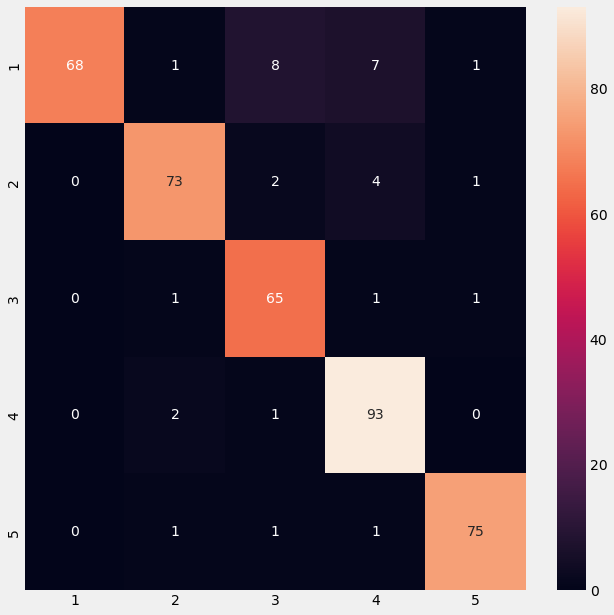

In [ ]:
df_cm = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(df_cm, annot=True)

### Concatanate image and text feature and use transformer to train

In [ ]:
def train(args, train_dataset, model, tokenizer, criterion):
    if args.local_rank in [-1, 0]:
        tb_writer = SummaryWriter()

    args.train_batch_size = args.per_gpu_train_batch_size * max(1, args.n_gpu)
    train_sampler = RandomSampler(train_dataset) if args.local_rank == -1 else DistributedSampler(train_dataset)
    train_dataloader = DataLoader(
        train_dataset,
        sampler=train_sampler,
        batch_size=args.train_batch_size,
        collate_fn=collate_fn,
        num_workers=args.num_workers,
    )

    if args.max_steps > 0:
        t_total = args.max_steps
        args.num_train_epochs = args.max_steps // (len(train_dataloader) // args.gradient_accumulation_steps) + 1
    else:
        t_total = len(train_dataloader) // args.gradient_accumulation_steps * args.num_train_epochs

    no_decay = ["bias", "LayerNorm.weight"]
    optimizer_grouped_parameters = [
        {
            "params": [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
            "weight_decay": args.weight_decay,
        },
        {"params": [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], "weight_decay": 0.0},
    ]

    optimizer = Adam(optimizer_grouped_parameters, lr=args.learning_rate, eps=args.adam_epsilon)
    scheduler = get_linear_schedule_with_warmup(
        optimizer, num_warmup_steps=args.warmup_steps, num_training_steps=t_total
    )
    if args.fp16:
        try:
            from apex import amp
        except ImportError:
            raise ImportError("Please install apex from https://www.github.com/nvidia/apex to use fp16 training.")
        model, optimizer = amp.initialize(model, optimizer, opt_level=args.fp16_opt_level)

    if args.n_gpu > 1:
        model = nn.DataParallel(model)

    if args.local_rank != -1:
        model = nn.parallel.DistributedDataParallel(
            model, device_ids=[args.local_rank], output_device=args.local_rank, find_unused_parameters=True
        )

    global_step = 0
    tr_loss, logging_loss = 0.0, 0.0
    best_f1, n_no_improve = 0, 0
    model.zero_grad()
    train_iterator = trange(int(args.num_train_epochs), desc="Epoch", disable=args.local_rank not in [-1, 0])
    for _ in train_iterator:
        epoch_iterator = tqdm(train_dataloader, desc="Iteration", disable=args.local_rank not in [-1, 0])
        for step, batch in enumerate(epoch_iterator):
            model.train()
            batch = tuple(t.to(args.device) for t in batch)
            labels = batch[5]
            inputs = {
                "input_ids": batch[0],
                "input_modal": batch[2],
                "attention_mask": batch[1],
                "modal_start_tokens": batch[3],
                "modal_end_tokens": batch[4],
            }
            outputs = model(**inputs)
            logits = outputs[0]  # model outputs are always tuple in transformers (see doc)
            loss = criterion(logits, labels)

            if args.n_gpu > 1:
                loss = loss.mean() 
            if args.gradient_accumulation_steps > 1:
                loss = loss / args.gradient_accumulation_steps

            if args.fp16:
                with amp.scale_loss(loss, optimizer) as scaled_loss:
                    scaled_loss.backward()
            else:
                loss.backward()

            tr_loss += loss.item()
            if (step + 1) % args.gradient_accumulation_steps == 0:
                if args.fp16:
                    nn.utils.clip_grad_norm_(amp.master_params(optimizer), args.max_grad_norm)
                else:
                    nn.utils.clip_grad_norm_(model.parameters(), args.max_grad_norm)

                optimizer.step()
                scheduler.step() 
                model.zero_grad()
                global_step += 1

                if args.local_rank in [-1, 0] and args.logging_steps > 0 and global_step % args.logging_steps == 0:
                    logs = {}
                    if (
                        args.local_rank == -1 and args.evaluate_during_training
                    ): 
                        results = evaluate(args, model, tokenizer, criterion)
                        for key, value in results.items():
                            eval_key = "eval_{}".format(key)
                            logs[eval_key] = value

                    loss_scalar = (tr_loss - logging_loss) / args.logging_steps
                    learning_rate_scalar = scheduler.get_lr()[0]
                    logs["learning_rate"] = learning_rate_scalar
                    logs["loss"] = loss_scalar
                    logging_loss = tr_loss

                    for key, value in logs.items():
                        tb_writer.add_scalar(key, value, global_step)
                    print(json.dumps({**logs, **{"step": global_step}}))

                if args.local_rank in [-1, 0] and args.save_steps > 0 and global_step % args.save_steps == 0:
                    # Save model checkpoint
                    output_dir = os.path.join(args.output_dir, "checkpoint-{}".format(global_step))
                    if not os.path.exists(output_dir):
                        os.makedirs(output_dir)
                    model_to_save = (
                        model.module if hasattr(model, "module") else model
                    )  # Take care of distributed/parallel training
                    torch.save(model_to_save.state_dict(), os.path.join(output_dir, WEIGHTS_NAME))
                    torch.save(args, os.path.join(output_dir, "training_args.bin"))

            if args.max_steps > 0 and global_step > args.max_steps:
                epoch_iterator.close()
                break
        if args.max_steps > 0 and global_step > args.max_steps:
            train_iterator.close()
            break

        if args.local_rank == -1:
            results = evaluate(args, model, tokenizer, criterion)
            if results["micro_f1"] > best_f1:
                best_f1 = results["micro_f1"]
                n_no_improve = 0
            else:
                n_no_improve += 1

            if n_no_improve > args.patience:
                train_iterator.close()
                break

    if args.local_rank in [-1, 0]:
        tb_writer.close()

    return global_step, tr_loss / global_step


In [ ]:

def evaluate(args, model, tokenizer, criterion, prefix=""):
    eval_output_dir = args.output_dir
    eval_dataset = load_examples(args, tokenizer, evaluate=True)

    if not os.path.exists(eval_output_dir) and args.local_rank in [-1, 0]:
        os.makedirs(eval_output_dir)

    args.eval_batch_size = args.per_gpu_eval_batch_size * max(1, args.n_gpu)
    eval_sampler = SequentialSampler(eval_dataset)
    eval_dataloader = DataLoader(
        eval_dataset, sampler=eval_sampler, batch_size=args.eval_batch_size, collate_fn=collate_fn
    )

    if args.n_gpu > 1 and not isinstance(model, nn.DataParallel):
        model = nn.DataParallel(model)

    logger.info("***** Running evaluation {} *****".format(prefix))
    logger.info("  Num examples = %d", len(eval_dataset))
    logger.info("  Batch size = %d", args.eval_batch_size)
    eval_loss = 0.0
    nb_eval_steps = 0
    preds = None
    out_label_ids = None
    for batch in tqdm(eval_dataloader, desc="Evaluating"):
        model.eval()
        batch = tuple(t.to(args.device) for t in batch)

        with torch.no_grad():
            batch = tuple(t.to(args.device) for t in batch)
            labels = batch[5]
            inputs = {
                "input_ids": batch[0],
                "input_modal": batch[2],
                "attention_mask": batch[1],
                "modal_start_tokens": batch[3],
                "modal_end_tokens": batch[4],
            }
            outputs = model(**inputs)
            logits = outputs[0]  # model outputs are always tuple in transformers (see doc)
            tmp_eval_loss = criterion(logits, labels)
            eval_loss += tmp_eval_loss.mean().item()
        nb_eval_steps += 1
        if preds is None:
            preds = torch.sigmoid(logits).detach().cpu().numpy() > 0.5
            out_label_ids = labels.detach().cpu().numpy()
        else:
            preds = np.append(preds, torch.sigmoid(logits).detach().cpu().numpy() > 0.5, axis=0)
            out_label_ids = np.append(out_label_ids, labels.detach().cpu().numpy(), axis=0)

    eval_loss = eval_loss / nb_eval_steps
    result = {
        "loss": eval_loss,
        "macro_f1": f1_score(out_label_ids, preds, average="macro"),
        "micro_f1": f1_score(out_label_ids, preds, average="micro"),
    }

    output_eval_file = os.path.join(eval_output_dir, prefix, "eval_results.txt")
    with open(output_eval_file, "w") as writer:
        for key in sorted(result.keys()):
            writer.write("%s = %s\n" % (key, str(result[key])))

    return result

In [ ]:
import numpy as np
a2=np.array(result)
np.save('result2.npy',a2)

In [ ]:
file2=np.array(file)
np.save('file2.npy',file2)

In [ ]:
result=np.load('result.npy')
result=result.tolist()
file=np.load('file.npy')
file=file.tolist()
for i in range(len(file)):
  file[i] = file[i][0:4]
file2=np.load('file2.npy')
file2=file2.tolist()
for i in range(len(file2)):
  file2[i] = file2[i][0:4]
result2=np.load('result2.npy')
result2=result2.tolist()

In [ ]:
dic = {}
for i in range(len(result)):
  for j in range(len(result[i])):
    result[i][j] = result[i][j]
for i in range(len(file)):
  dic[file[i]] = result[i]
for j in range(len(file2)):
  dic[file2[j]] = np.sum([dic[file2[j]],result2[j]],axis=0)

In [ ]:
cor = 0
err = 0
errs = []
y_pred = []
for i in dic:
  label = (int)(i[0])
  max = 0
  index = 0
  for j in range(len(dic[i])):
    if dic[i][j] > max:
      max = dic[i][j]
      index = j + 1
  if label == index:
    cor += 1
  else:
    err += 1
    errs.append(i)  
  y_pred.append(index)     

In [ ]:
y_true = []
for i in list(dic.keys()):
  y_true.append(int(i[0]))

In [ ]:
res = 0
for i in y_true:
  if i==2:
    res += 1
res

80

### Evaluate the model

### When use image and title in multimodal

In [ ]:
print('Test Data accuracy: ', cor/(cor+err))

Test Data accuracy:  0.9705159705159705


In [ ]:
confusion_mat = confusion_matrix(y_true = y_true, y_pred = y_pred, labels= list(encoded_classes))

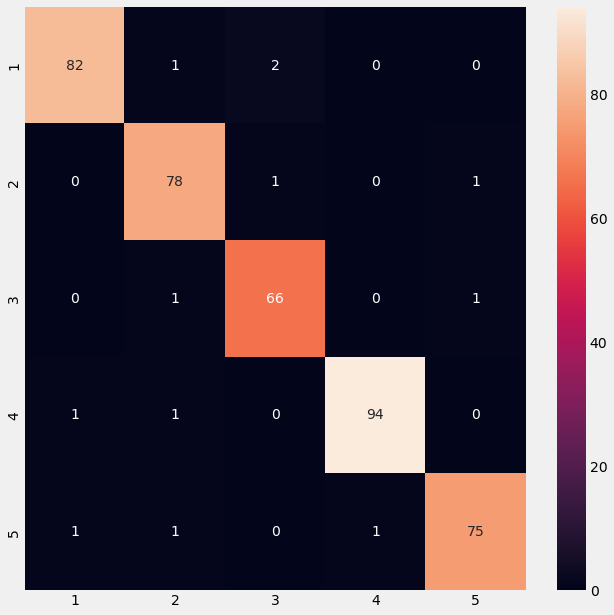

In [ ]:
df_cm = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(df_cm, annot=True)

### When use main text and title in multimodal

In [ ]:
print('Test Data accuracy: ', cor/(cor+err))

Test Data accuracy:  0.9803439803439803


In [ ]:
confusion_mat = confusion_matrix(y_true = y_true, y_pred = y_pred, labels= list(encoded_classes))

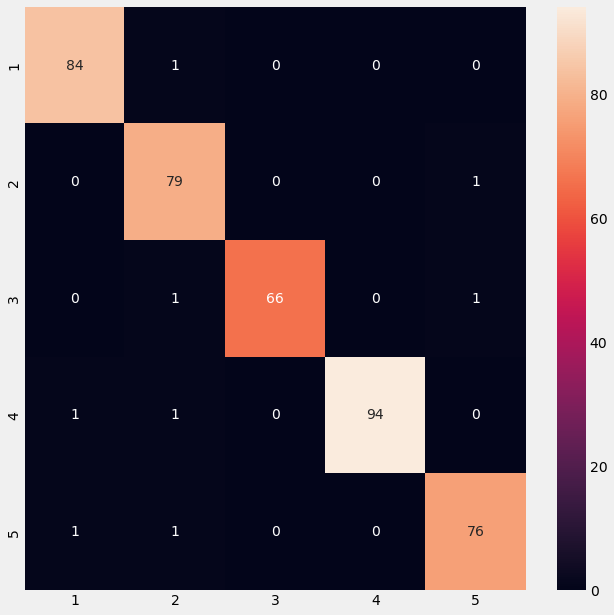

In [ ]:
df_cm = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(df_cm, annot=True)